In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

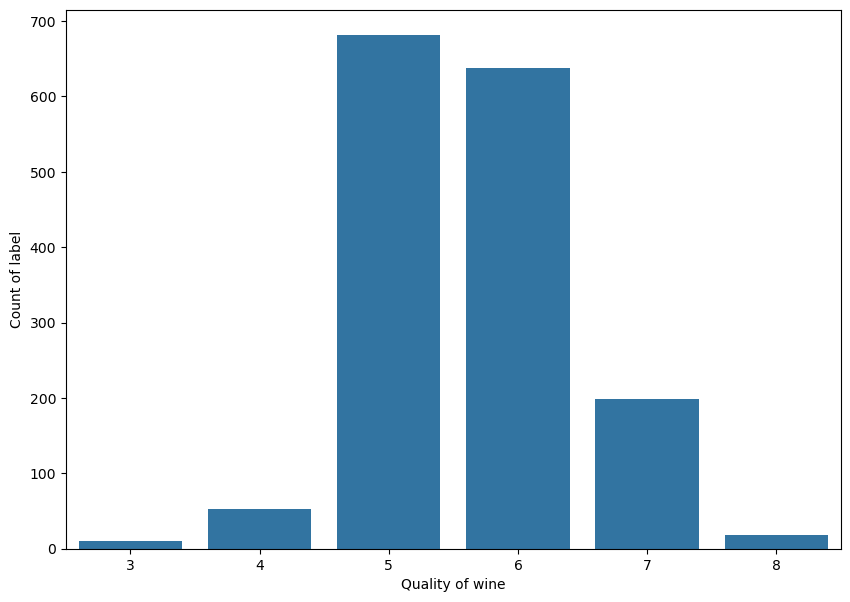

In [7]:
plt.figure(figsize=(10,7))
sns.countplot(x='quality',data=df)
plt.xlabel('Quality of wine')
plt.ylabel('Count of label')
plt.show()

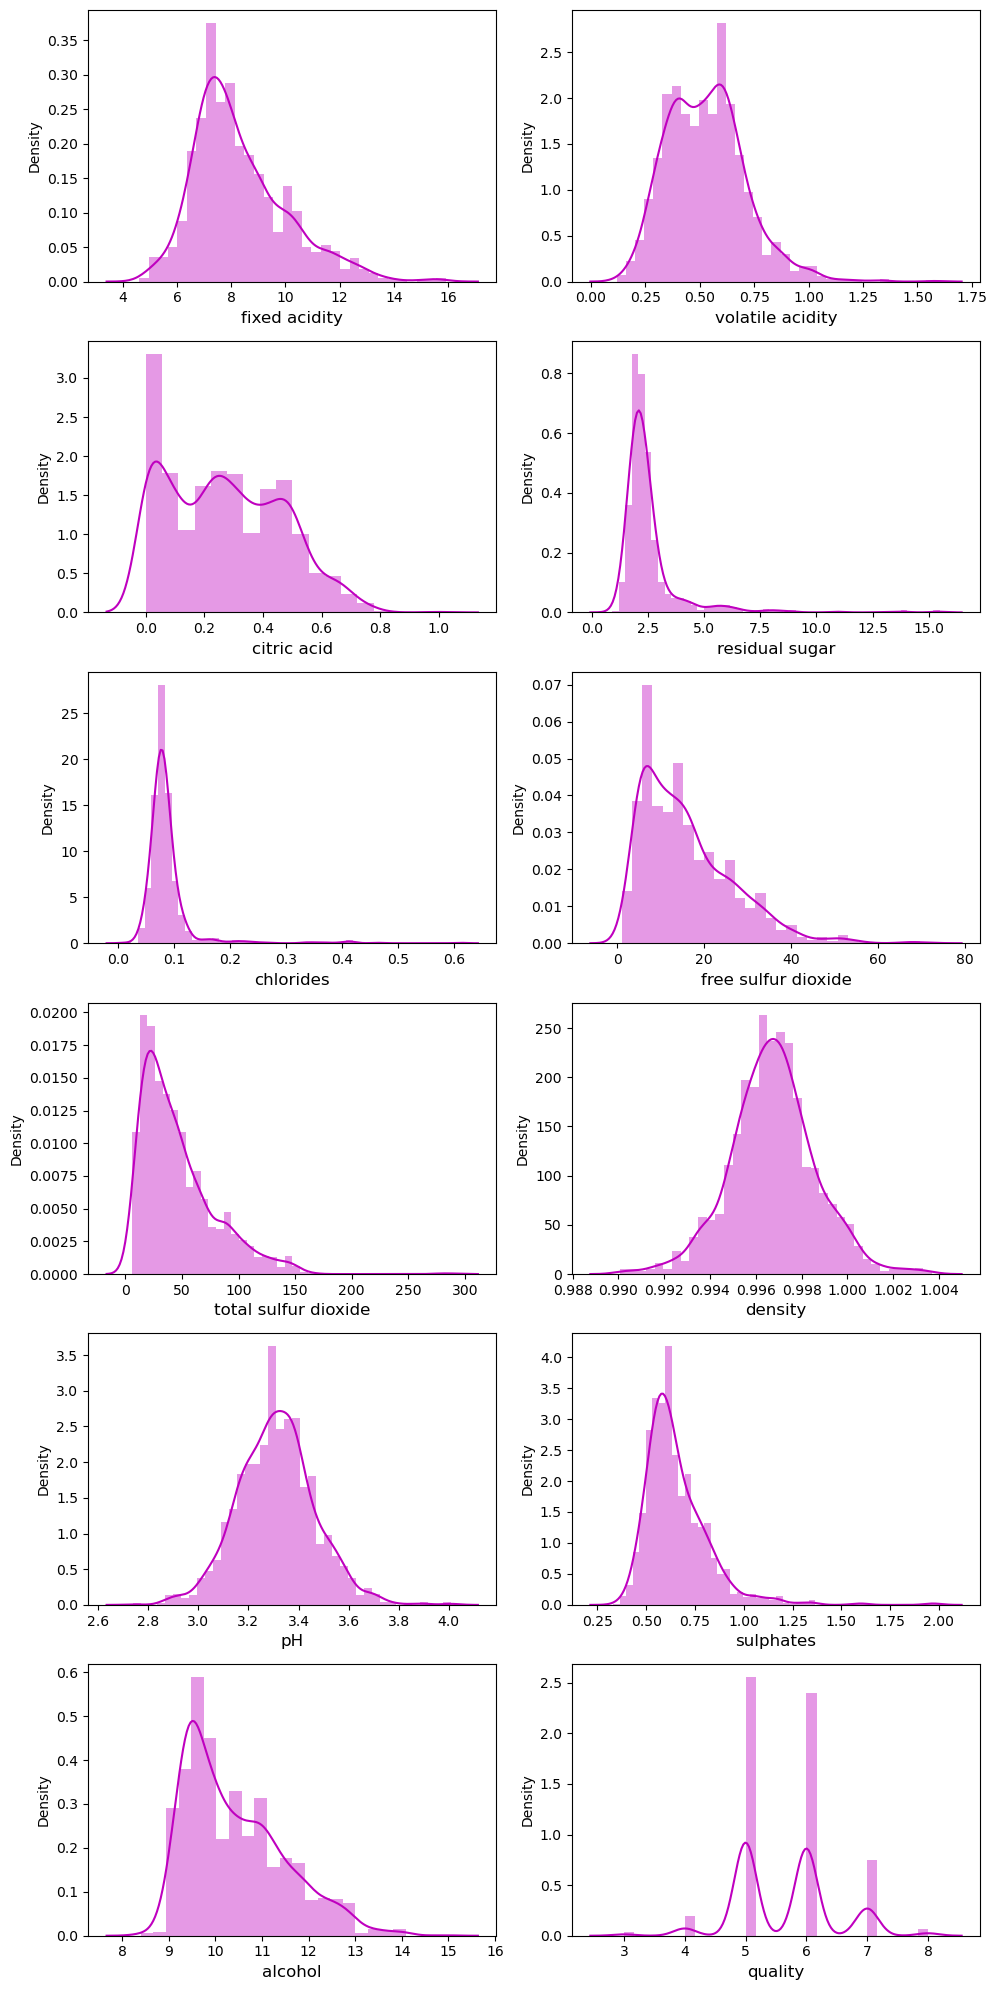

In [8]:
plt.figure(figsize=(10,20),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

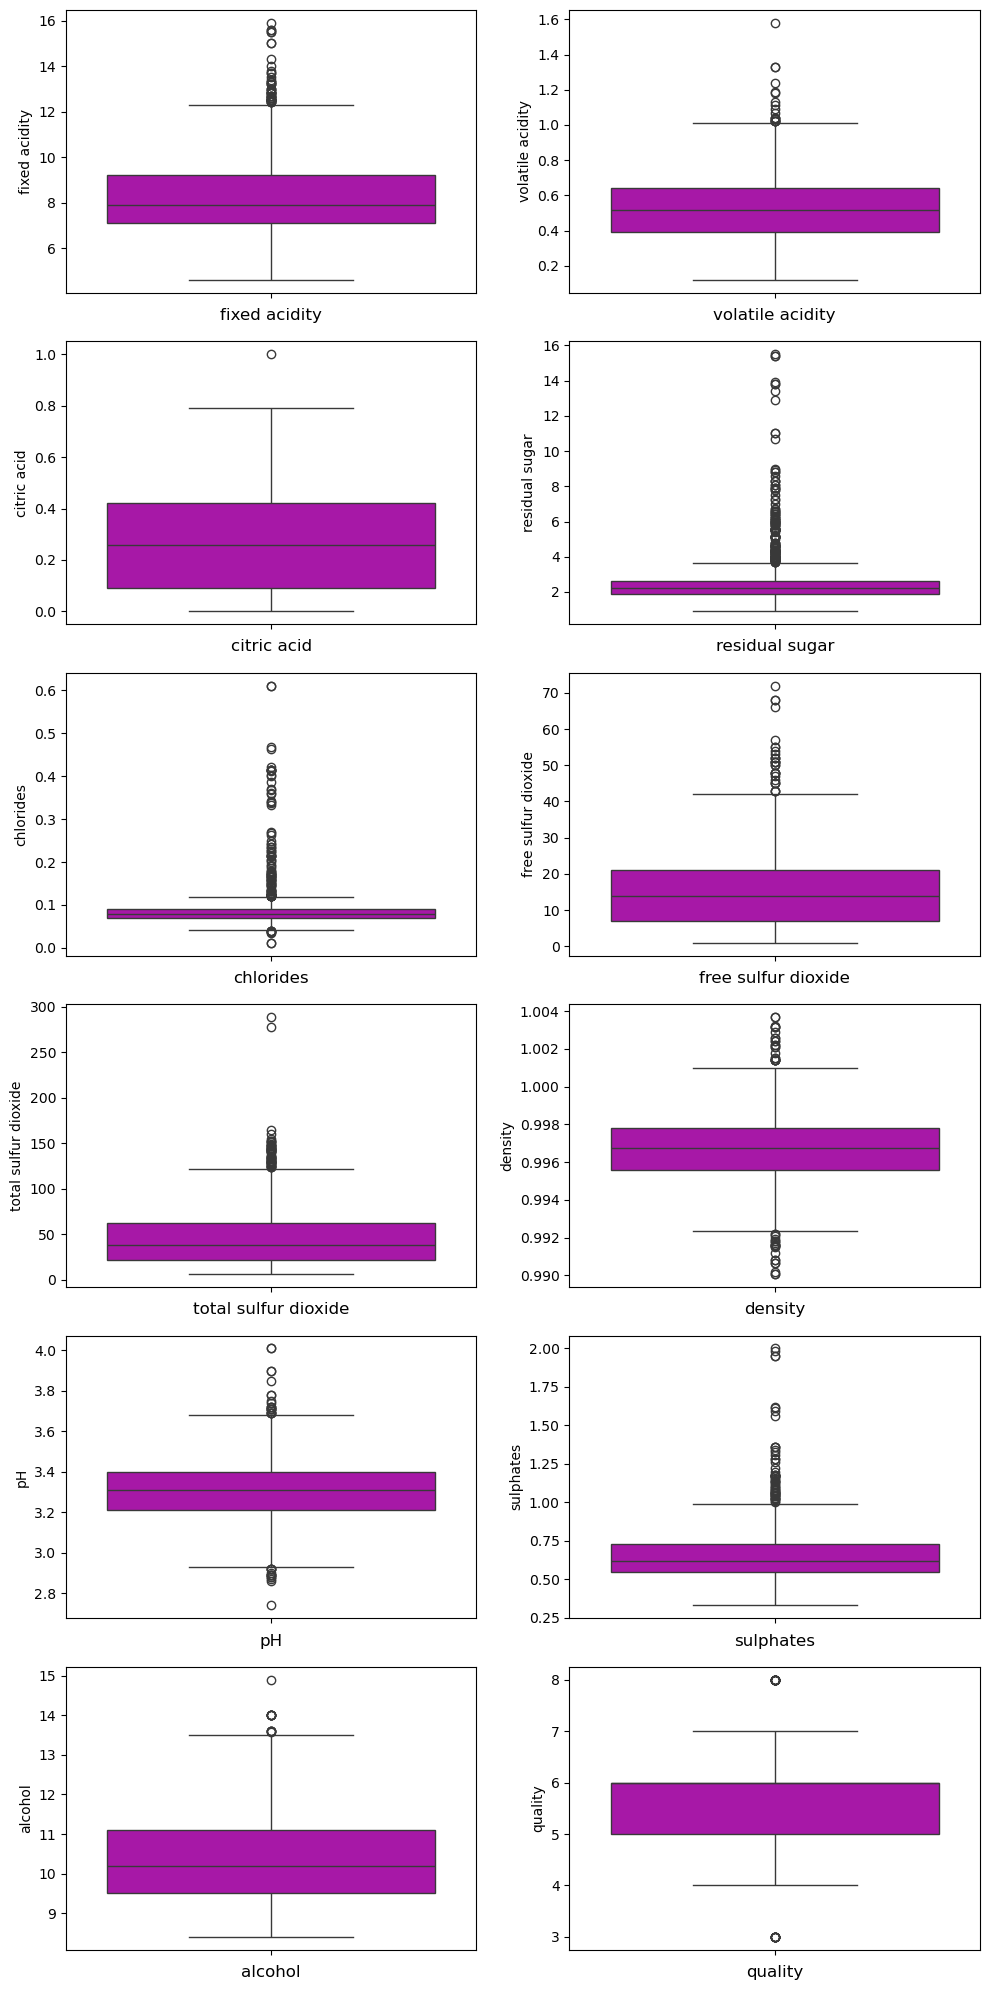

In [9]:
plt.figure(figsize=(10,20),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

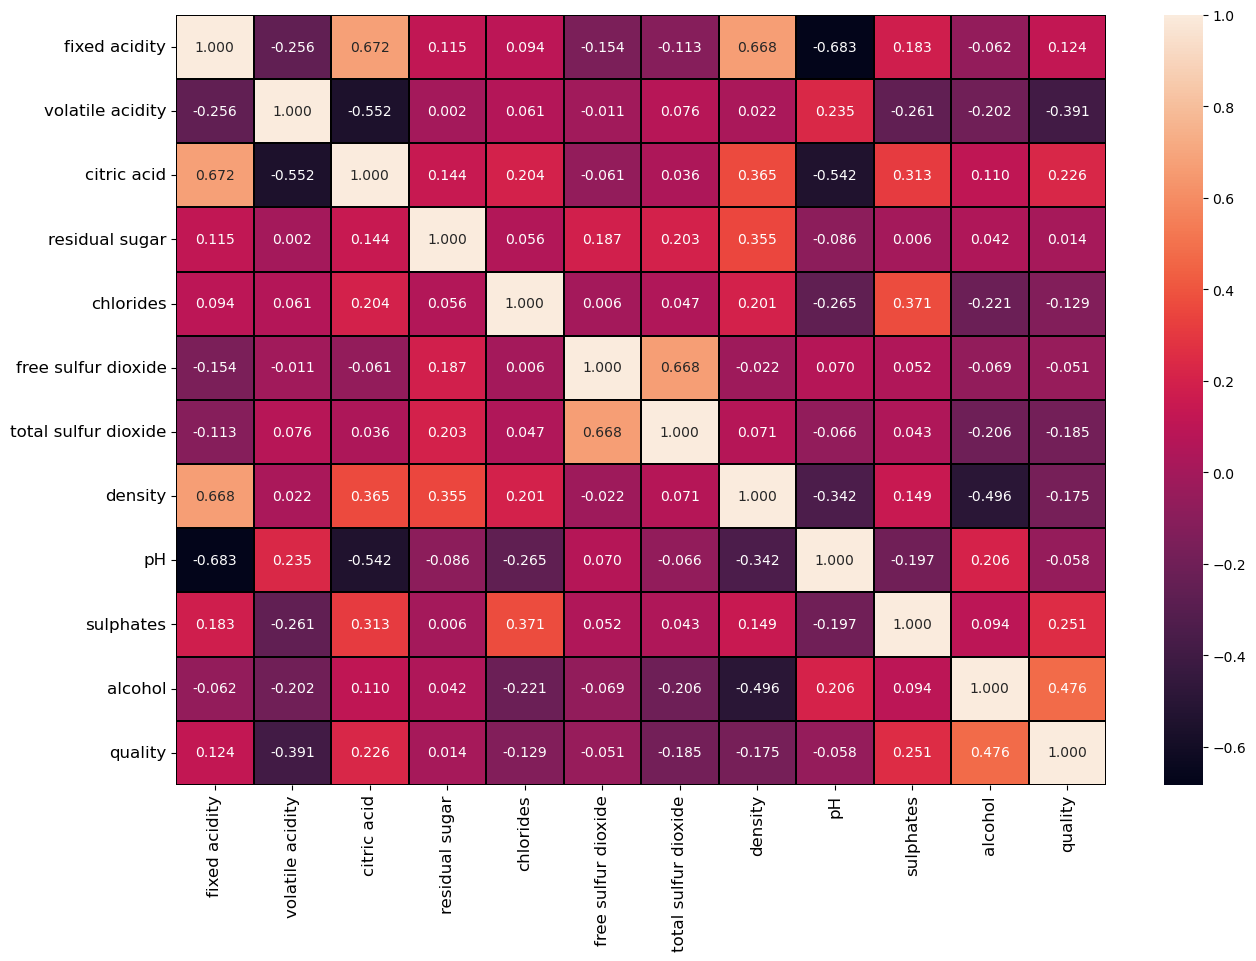

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True,fmt='0.3f',linecolor="black",linewidths=0.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
corr=df.corr()
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [13]:
from scipy.stats import zscore

In [14]:
df.shape

(1599, 12)

In [15]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [18]:
Y.value_counts()

quality
5    617
6    586
7    185
4     47
8     16
Name: count, dtype: int64

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1451 non-null   float64
 1   volatile acidity      1451 non-null   float64
 2   citric acid           1451 non-null   float64
 3   residual sugar        1451 non-null   float64
 4   chlorides             1451 non-null   float64
 5   free sulfur dioxide   1451 non-null   float64
 6   total sulfur dioxide  1451 non-null   float64
 7   density               1451 non-null   float64
 8   pH                    1451 non-null   float64
 9   sulphates             1451 non-null   float64
 10  alcohol               1451 non-null   float64
dtypes: float64(11)
memory usage: 136.0 KB


In [23]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 1451 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype
--------------  -----
1451 non-null   int64
dtypes: int64(1)
memory usage: 22.7 KB


In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
sampling=SMOTE()
X,Y=sampling.fit_resample(X,Y)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3085 non-null   float64
 1   volatile acidity      3085 non-null   float64
 2   citric acid           3085 non-null   float64
 3   residual sugar        3085 non-null   float64
 4   chlorides             3085 non-null   float64
 5   free sulfur dioxide   3085 non-null   float64
 6   total sulfur dioxide  3085 non-null   float64
 7   density               3085 non-null   float64
 8   pH                    3085 non-null   float64
 9   sulphates             3085 non-null   float64
 10  alcohol               3085 non-null   float64
dtypes: float64(11)
memory usage: 265.2 KB


In [27]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3085 entries, 0 to 3084
Series name: quality
Non-Null Count  Dtype
--------------  -----
3085 non-null   int64
dtypes: int64(1)
memory usage: 24.2 KB


In [28]:
Y.value_counts()

quality
5    617
6    617
7    617
4    617
8    617
Name: count, dtype: int64

In [29]:
Y=Y.apply(lambda y_val:1 if y_val>=7 else 0)

In [30]:
Y.value_counts()

quality
0    1851
1    1234
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.687673,1.070072,-1.518625,-0.639797,-0.138084,-0.252324,-0.078591,0.836534,1.521537,-0.781006,-1.260401
1,-0.434889,2.085591,-1.518625,0.166890,1.102517,1.301770,1.188392,0.223463,-0.729258,0.117936,-0.895682
2,-0.434889,1.408579,-1.314140,-0.178833,0.764171,0.191703,0.689278,0.346077,-0.293621,-0.106799,-0.895682
3,1.713776,-1.299472,1.344166,-0.639797,-0.194475,0.413716,0.919638,0.959148,-1.019684,-0.631183,-0.895682
4,-0.687673,1.070072,-1.518625,-0.639797,-0.138084,-0.252324,-0.078591,0.836534,1.521537,-0.781006,-1.260401
...,...,...,...,...,...,...,...,...,...,...,...
3080,0.344623,-0.578677,0.992098,-0.710322,-0.404410,-0.690198,-0.767544,-1.190175,-0.660677,0.205306,1.596496
3081,-1.423232,1.136220,-0.683376,-0.514862,-1.371570,-0.049220,1.453149,-1.643278,1.462902,1.249571,1.905674
3082,0.269111,0.301994,0.722618,0.979604,0.030093,-0.651556,-0.708378,-1.325397,-0.685951,0.350560,2.194828
3083,-0.610456,-0.813196,0.419075,0.324110,-0.694896,0.191703,-0.129188,-0.323710,-0.110420,1.062026,1.101519


In [34]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [43]:
def evalution(model,X,Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)
    model.fit(X_train,Y_train)
    pred=model.predict(X_test)
    acc=(accuracy_score(Y_test,pred))*100
    class_report=classification_report(Y_test,pred)
    cross_val=(cross_val_score(model,X,Y,cv=5).mean())*100
    result=acc-cross_val
    print('Accuracy :',acc)
    print('Classification report :\n',
          class_report)
    print("Cross validation score  :",cross_val)
    print('Accuracy-Cross_validation  :',result)

In [37]:
from sklearn.linear_model import LogisticRegression

In [44]:
model=LogisticRegression()
evalution(model,X,Y)

Accuracy : 88.01295896328294
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       575
           1       0.81      0.89      0.85       351

    accuracy                           0.88       926
   macro avg       0.87      0.88      0.87       926
weighted avg       0.88      0.88      0.88       926

Cross validation score  : 88.16855753646678
Accuracy-Cross_validation  : -0.15559857318383763


In [45]:
from sklearn.svm import SVC

In [46]:
model=SVC()
evalution(model,X,Y)

Accuracy : 80.02159827213823
Classification report :
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       575
           1       0.78      0.66      0.72       351

    accuracy                           0.80       926
   macro avg       0.79      0.77      0.78       926
weighted avg       0.80      0.80      0.80       926

Cross validation score  : 80.03241491085899
Accuracy-Cross_validation  : -0.010816638720754668


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model=DecisionTreeClassifier()
evalution(model,X,Y)

Accuracy : 90.49676025917927
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       575
           1       0.87      0.87      0.87       351

    accuracy                           0.90       926
   macro avg       0.90      0.90      0.90       926
weighted avg       0.90      0.90      0.90       926

Cross validation score  : 87.81199351701783
Accuracy-Cross_validation  : 2.684766742161443


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model=RandomForestClassifier()
evalution(model,X,Y)

Accuracy : 93.62850971922246
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       575
           1       0.90      0.93      0.92       351

    accuracy                           0.94       926
   macro avg       0.93      0.94      0.93       926
weighted avg       0.94      0.94      0.94       926

Cross validation score  : 92.31766612641815
Accuracy-Cross_validation  : 1.3108435928043178


In [53]:
from sklearn.ensemble import ExtraTreesClassifier

In [54]:
model=ExtraTreesClassifier()
evalution(model,X,Y)

Accuracy : 94.60043196544277
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       575
           1       0.91      0.95      0.93       351

    accuracy                           0.95       926
   macro avg       0.94      0.95      0.94       926
weighted avg       0.95      0.95      0.95       926

Cross validation score  : 93.54943273905997
Accuracy-Cross_validation  : 1.0509992263827996


In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
model=KNeighborsClassifier()
evalution(model,X,Y)

Accuracy : 88.87688984881208
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       575
           1       0.80      0.94      0.87       351

    accuracy                           0.89       926
   macro avg       0.88      0.90      0.89       926
weighted avg       0.90      0.89      0.89       926

Cross validation score  : 86.48298217179902
Accuracy-Cross_validation  : 2.393907677013061


In [57]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

In [58]:
model=GradientBoostingClassifier()
evalution(model,X,Y)

Accuracy : 90.49676025917927
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       575
           1       0.84      0.92      0.88       351

    accuracy                           0.90       926
   macro avg       0.90      0.91      0.90       926
weighted avg       0.91      0.90      0.91       926

Cross validation score  : 90.34035656401946
Accuracy-Cross_validation  : 0.15640369515980979


In [59]:
model=AdaBoostClassifier()
evalution(model,X,Y)

Accuracy : 89.41684665226782
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       575
           1       0.83      0.90      0.87       351

    accuracy                           0.89       926
   macro avg       0.88      0.90      0.89       926
weighted avg       0.90      0.89      0.89       926

Cross validation score  : 88.46029173419772
Accuracy-Cross_validation  : 0.956554918070097


In [60]:
model=BaggingClassifier()
evalution(model,X,Y)

Accuracy : 92.87257019438445
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       575
           1       0.90      0.92      0.91       351

    accuracy                           0.93       926
   macro avg       0.92      0.93      0.92       926
weighted avg       0.93      0.93      0.93       926

Cross validation score  : 90.79416531604538
Accuracy-Cross_validation  : 2.0784048783390716


In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
params={'criterion':['gini','entropy'],
        'max_depth':[2,3,4],
        'max_leaf_nodes':[2,3,4],
       'min_samples_split':[0.1,0.5,0.8],
       'min_samples_leaf':[0.5,0.1,0.8],
       'bootstrap':[True,False],
       'oob_score':[True,False]}

In [63]:
rfc=RandomForestClassifier()
grid=GridSearchCV(rfc,param_grid=params)

In [64]:
grid.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [0.5, 0.1, 0.8],
                         'min_samples_split': [0.1, 0.5, 0.8],
                         'oob_score': [True, False]})

In [65]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'oob_score': True}

In [67]:
final_model=RandomForestClassifier(bootstrap=True,
 criterion='gini',
 max_depth=2,
 max_leaf_nodes=4,
 min_samples_leaf=0.1,
 min_samples_split=0.1,
 oob_score=True)

In [68]:
final_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, max_leaf_nodes=4, min_samples_leaf=0.1,
                       min_samples_split=0.1, oob_score=True)

In [69]:
pred=final_model.predict(X_test)

In [71]:
acc=accuracy_score(Y_test,pred)
print(acc)

0.8552915766738661


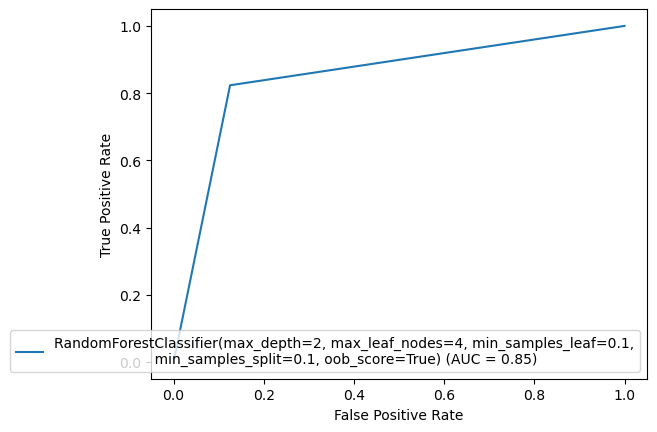

In [73]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,threshold=roc_curve(Y_test,pred)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [75]:
import joblib
joblib.dump(final_model,'Wine_Quality.pkl')

['Wine_Quality.pkl']

In [76]:
model=joblib.load("Wine_Quality.pkl")
prediction=model.predict(X_test)
prediction

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,

In [78]:
a=np.array(Y_test)
df1=pd.DataFrame()
df1['Predicted']=prediction
df1['Actual']=a
df1

,Predicted,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
921,0,0
922,1,1
923,0,1
924,0,0
